In [2]:
# seg conda env
import os
#import h5py
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append(os.path.dirname(os.getcwd()))
from mayavi import mlab as mlab

from utils import make_dir_safely

%matplotlib inline


Qt: Session management error: None of the authentication protocols specified are supported


In [3]:
basepath_path = '/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/CNN-segmentation/logdir/inference_results'
experiments = list(set(os.listdir(basepath_path)) - set(['before_oct_23']))
experiments.sort()
print(experiments)

['231023-1024_da_0.0_nchan4_r1_loss_dice_cutz_e125_bs8_lr0.001__full_run_freiburg', '231023-1031_da_0.0_nchan4_r1_loss_crossentropy_cutz_e125_bs8_lr0.001__full_run_freiburg', '231023-1034_da_0.0_nchan1_r1_loss_dice_cutz_e125_bs8_lr0.001__full_run_freiburg', '231030-1454_da_0.0_nchan1_r1_loss_dice_e125_bs8_lr0.001_w_val_tr_only_w_labels_only_w_bern', '231030-1457_da_0.0_nchan4_r1_loss_dice_e125_bs8_lr0.001_w_val_tr_only_w_labels_only_w_bern', '231030-1459_da_0.0_nchan4_r1_loss_dice_e125_bs8_lr0.001_w_val_tr_size_40_only_w_bern', '231030-1500_da_0.0_nchan1_r1_loss_dice_e125_bs8_lr0.001_w_val_tr_size_40_only_w_bern', '231030-1501_da_0.0_nchan4_r1_loss_dice_e125_bs8_lr0.001__tr_size_40_only_w_bern', '231030-1520_da_0.0_nchan4_r1_loss_dice_e125_bs8_lr0.001__tr_only_w_labels_only_w_bern', '231030-1542_da_0.0_nchan4_r1_loss_dice_e125_bs8_lr0.001_w_val_tr_only_w_labels_bern_and_freiburg', '231030-1545_da_0.0_nchan4_r1_loss_dice_e125_bs8_lr0.001_w_val_tr_size_40_bern_and_freiburg', '231030-1550

In [4]:
experiment_name = "231030-1542_da_0.0_nchan4_r1_loss_dice_e125_bs8_lr0.001_w_val_tr_only_w_labels_bern_and_freiburg" 
#experiment_name = experiments[18]
print(experiment_name)
results_path = os.path.join(basepath_path, experiment_name)
save_images_path = os.path.join(results_path, 'images')
make_dir_safely(save_images_path)

231030-1542_da_0.0_nchan4_r1_loss_dice_e125_bs8_lr0.001_w_val_tr_only_w_labels_bern_and_freiburg


In [7]:
results_path

'/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/CNN-segmentation/logdir/inference_results/231030-1608_da_0.0_nchan4_r1_loss_dice_e80_bs8_lr0.001_w_val_tr_only_w_labels_finetune'

In [6]:
class_results_files = []
class_results_paths = []
for class_label in ['patients_compressed_sensing']:#['controls', 'patients']:
    try:
        for file in os.listdir(os.path.join(results_path, class_label)):
            if file.endswith('.npy'):
                class_results_files.append(file)
                class_results_paths.append(os.path.join(results_path, class_label, file))
    except:
        pass
    
print(class_results_files)

['seg_MACDAVD_204_.npy', 'seg_MACDAVD_205_.npy', 'seg_MACDAVD_305_.npy', 'seg_MACDAVD_306_.npy', 'seg_MACDAVD_307_.npy', 'seg_MACDAVD_308_.npy', 'seg_MACDAVD_309_.npy', 'seg_MACDAVD_310_.npy']


#### Here I am saving all of the segmentations in one go

No image per image visualization 

In [7]:

azimuth = 270
elevation = 220
distance = 300
focalpoint = (80, 70, 10)

def visualize_and_save(patient_name, seg, save_images_path, compressed_sensing=False):
    mlab.figure()
    mlab.contour3d(seg[...,0], colormap='gray')
    mlab.axes(xlabel='X', ylabel='Y', zlabel='Z')  # Display axis
    mlab.orientation_axes()
    mlab.view(azimuth=azimuth, elevation=elevation, distance=distance, focalpoint=focalpoint)
    if compressed_sensing:
        save_images_path = os.path.join(save_images_path, 'compressed_sensing')
        make_dir_safely(save_images_path)
    mlab.savefig(os.path.join(save_images_path, f'{patient_name}_seg_3d.png'))
    mlab.close()

for n, patient_n in enumerate(class_results_files):
    print(patient_n)
    patient_name = patient_n.split('__')[0]
    print(patient_name)

    
    seg = np.load(class_results_paths[n], allow_pickle=True)
    # Check if compressed sensing
    if class_results_paths[n].__contains__('compressed_sensing'):
        visualize_and_save(patient_name, seg, save_images_path, compressed_sensing=True)
    else:
        visualize_and_save(patient_name, seg, save_images_path)

seg_MACDAVD_204_.npy
seg_MACDAVD_204_.npy
seg_MACDAVD_205_.npy
seg_MACDAVD_205_.npy
seg_MACDAVD_305_.npy
seg_MACDAVD_305_.npy
seg_MACDAVD_306_.npy
seg_MACDAVD_306_.npy
seg_MACDAVD_307_.npy
seg_MACDAVD_307_.npy
seg_MACDAVD_308_.npy
seg_MACDAVD_308_.npy
seg_MACDAVD_309_.npy
seg_MACDAVD_309_.npy
seg_MACDAVD_310_.npy
seg_MACDAVD_310_.npy


### Here I want to visualize using the mlab to allow for 3D visualizations

In [11]:
# Subject of interest
n = 1
patient_n =class_results_files[n]
print(patient_n)
patient_name = patient_n.split('__')[0]
print(patient_name)

seg_MACDAVD_205_.npy
seg_MACDAVD_205_.npy


In [12]:
seg = np.load(class_results_paths[n], allow_pickle=True)

azimuth = 270
elevation = 220
distance= 300
focalpoint = (80,70,10)


mlab.figure()
mlab.contour3d(seg[...,0], colormap = 'gray')
mlab.axes(xlabel='X', ylabel='Y', zlabel='Z') #Display axis
mlab.orientation_axes()
mlab.view(azimuth=azimuth, elevation=elevation, distance=distance, focalpoint = focalpoint)
#mlab.savefig(os.path.join(save_images_path,f'{patient_name}_seg_3d.png'))

mlab.show()

#### Save the 3D visualization based on how many of the subejcts were seen in the previous celll

In [17]:
image_list = os.listdir(save_images_path)
image_list.sort()
n_images = len(image_list)
print('n_images', n_images)

n_images 5


In [29]:
results_path

'/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/CNN-segmentation/logdir/inference_results/231023-1031_da_0.0_nchan4_r1_loss_crossentropy_cutz_e125_bs8_lr0.001__full_run_freiburg'

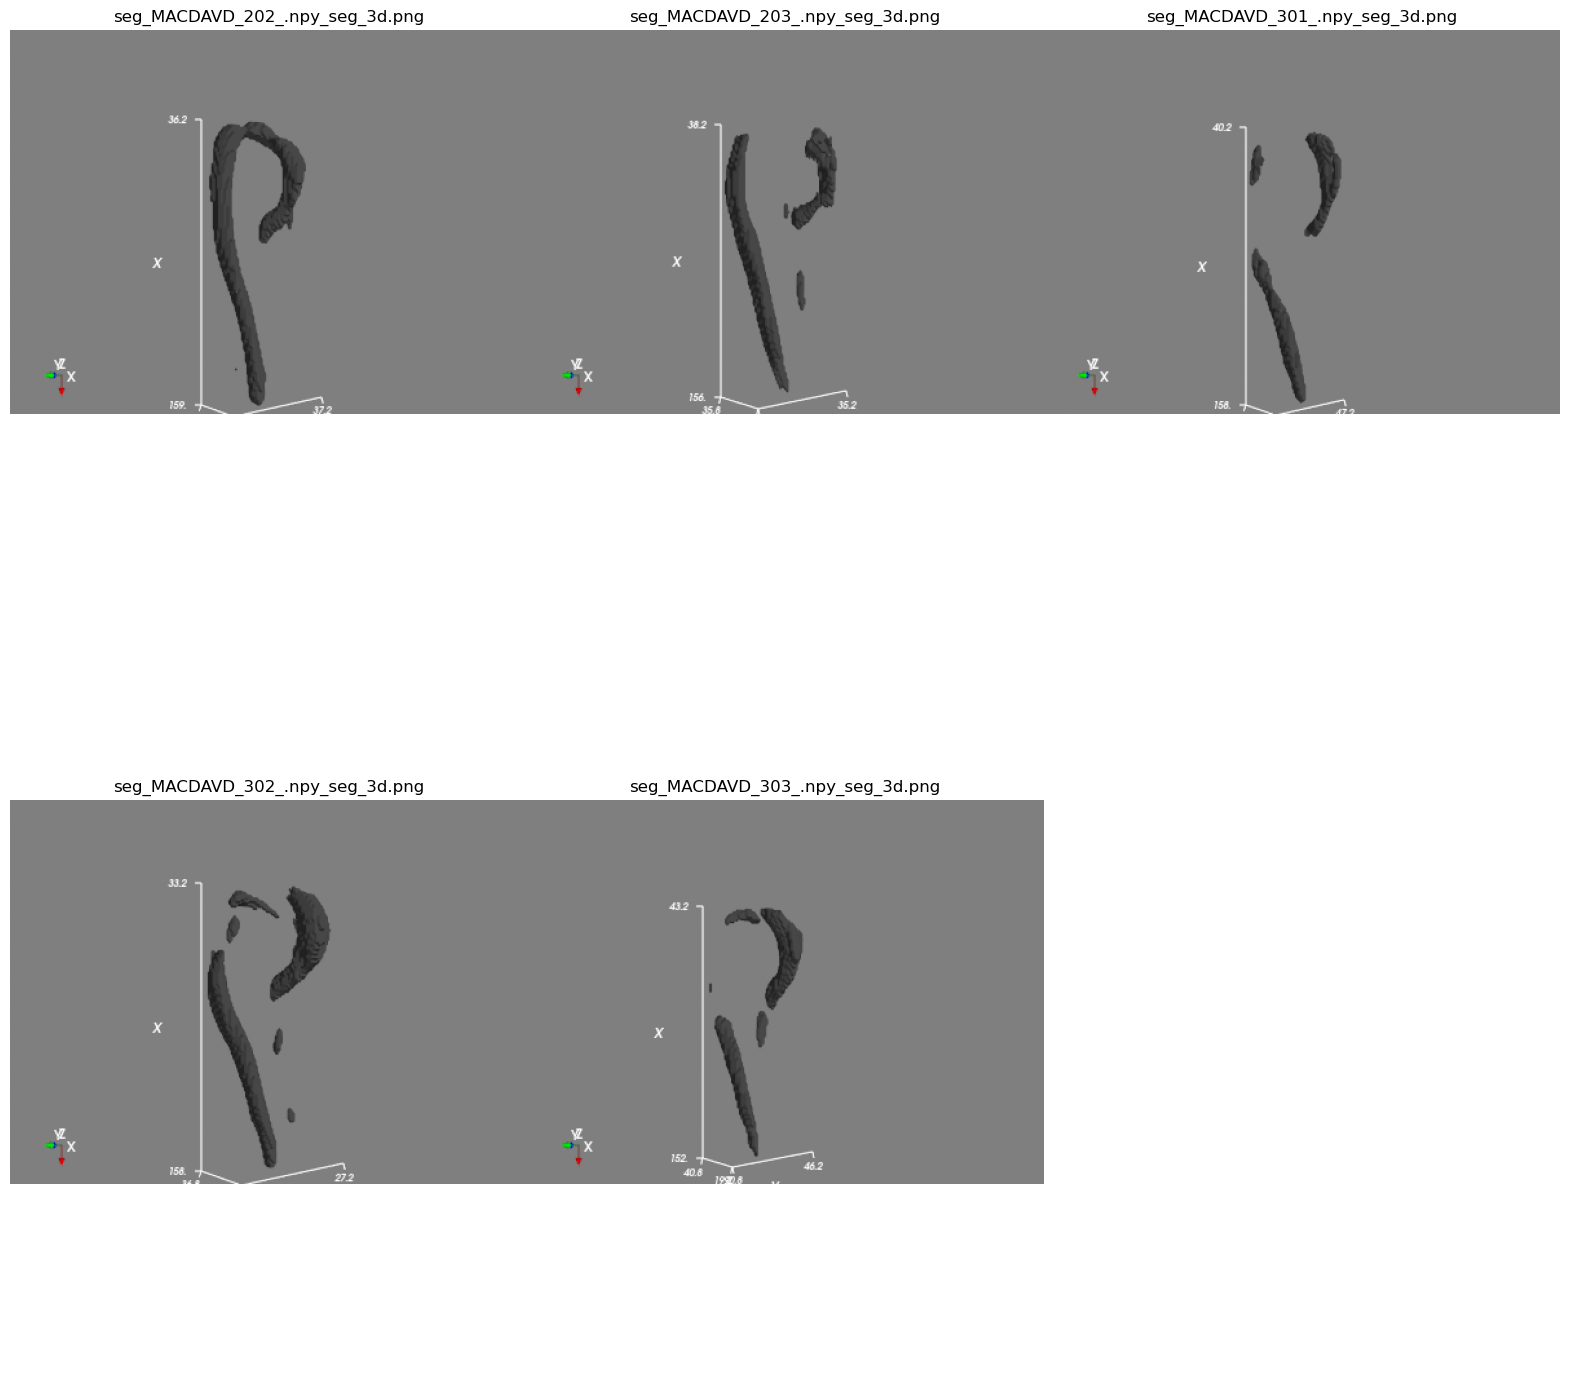

In [30]:
n_cols = int(np.ceil(np.sqrt(n_images)))
n_rows = int(np.ceil(n_images / n_cols))

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))
ax = ax.flatten()  # Flatten the 2D array of axes for easy indexing

for i, file in enumerate(image_list):
    img = plt.imread(os.path.join(save_images_path, file))
    ax[i].imshow(img)
    ax[i].set_title(file)
    ax[i].axis('off')

# Hide any remaining empty subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(os.path.join(results_path, 'all_inference_segmentations_viz.png'))
plt.show()